In [27]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

##1. Load the data

df = pd.read_excel("housing.xlsx")

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [29]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [30]:
X = df.drop("median_house_value", axis = 1)
Y = df["median_house_value"]

In [31]:
## 2. Handle missing values
X.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [32]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].mean())

In [33]:
X.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [34]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [35]:
##Encode categorical data

df1 = pd.get_dummies(X['ocean_proximity'])

In [36]:
df1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [37]:
X = pd.concat([X, df1], axis=1).reindex(df.index)

In [38]:
X.drop('ocean_proximity', axis=1, inplace=True)

In [39]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


In [80]:
## 4. Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [81]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [82]:
type(X_train)

numpy.ndarray

In [83]:
## 5. Standardize data 
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
Y_train = object.fit_transform(Y_train)
Y_test = object.fit_transform(Y_test)


In [76]:
##X_train = X_train.reshape(-1,1)

##X_test = X_test.reshape(-1,1)

In [84]:
## 6. Perform Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [85]:
lm.coef_

array([[-0.46959202, -0.47524462,  0.12000773, -0.09168507,  0.2619366 ,
        -0.37357447,  0.24309035,  0.64330638,  0.05030324, -0.10440986,
         0.02086915,  0.02022685,  0.05022507]])

lm.intecet

In [86]:
lm.intercept_

array([5.02596391e-16])

In [87]:
preds = lm.predict(X_test)
preds

array([[ 0.08509055],
       [ 0.69571552],
       [-0.23304258],
       ...,
       [ 0.15593717],
       [ 0.77111862],
       [ 0.70433327]])

In [88]:
print(sqrt(mean_squared_error(Y_test,preds)))

0.6009916525619308


In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)

lm.rsquared

lm.conf_int()

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [42]:
## 7. Perform Decision Tree Regression

Classifier = DecisionTreeClassifier()

Classifier.fit(X_train, Y_train)

predict = Classifier.predict(X_test)

In [45]:
print(sqrt(mean_squared_error(Y_test,predict)))

79523.2537453181


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [47]:
## 8. Perform Random Forest Regression
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [48]:
classifier.fit(X_train,Y_train)
Y_predict = classifier.predict(X_test)

In [51]:
print(sqrt(mean_squared_error(Y_test,Y_predict)))

69827.99715587698


In [76]:
## 9. Bonus exercise: Perform Linear Regression with one independent variable
X = df['median_income']
Y = df["median_house_value"]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [104]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [107]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


In [108]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)

Y_train = object.fit_transform(Y_train)
Y_test = object.fit_transform(Y_test)

In [109]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [111]:
preds_1 = lm.predict(X_test)
preds_1

array([[ 0.10607599],
       [ 0.69531393],
       [ 0.17735068],
       ...,
       [-0.08295218],
       [ 0.59891752],
       [ 0.32764654]])

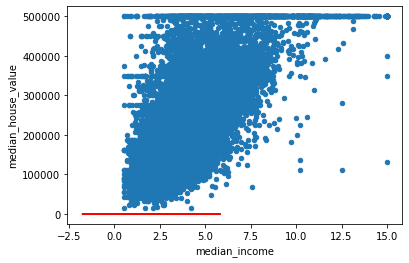

In [117]:
import matplotlib.pyplot as plt

df.plot(kind = 'scatter', x = "median_income", y = 'median_house_value')
plt.plot(X_test,preds_1, c = 'red', linewidth=2)

In [112]:
print(sqrt(mean_squared_error(Y_test,Y_predict)))

242240.9643463396
